In [16]:
import os
from deepface import DeepFace
import glob
from tqdm import tqdm

import numpy as np
import pandas as pd

In [17]:
def authenticate_user(image_path):
    result = DeepFace.find(image_path, db_path="../dataset/all_images", silent=True)
    return result

In [18]:
images = glob.glob("../data/luminance/**/*.jpg", recursive=True)


def get_profile_data_dict(image_path: str):
    normalized = os.path.normpath(image_path)
    path_parts = normalized.split(os.sep)

    method = path_parts[-3]

    amount = (
        float(path_parts[-2].replace("_", ".")).__round__(2)
        if method != "quadratic"
        else np.nan
    )

    return {
        "name": path_parts[-4],
        "method": path_parts[-3],
        "amount": amount,
        "sample_number": int(path_parts[-1].replace(".jpg", "")),
        "path": image_path,
    }


profile_data_structured = list(map(get_profile_data_dict, images))
profile_data_structured[0:3]

[{'name': 'Jake_Gyllenhaalprofile',
  'method': 'linear',
  'amount': 0.5,
  'sample_number': 4,
  'path': '../data/luminance/profiles/Jake_Gyllenhaalprofile/linear/0_5/4.jpg'},
 {'name': 'Jake_Gyllenhaalprofile',
  'method': 'linear',
  'amount': 0.5,
  'sample_number': 3,
  'path': '../data/luminance/profiles/Jake_Gyllenhaalprofile/linear/0_5/3.jpg'},
 {'name': 'Jake_Gyllenhaalprofile',
  'method': 'linear',
  'amount': 0.5,
  'sample_number': 0,
  'path': '../data/luminance/profiles/Jake_Gyllenhaalprofile/linear/0_5/0.jpg'}]

In [19]:
def try_authentication(profile_data_structured):
    try:
        result = authenticate_user(profile_data_structured["path"])
        distance = result[0]["distance"][0]
        person = " ".join((result[0]["identity"][0]).split("\\")[-1].split("_")[:-2])
        max_distance = 0.35
        return distance <= max_distance, distance, person
    except:
        return pd.NA, pd.NA, pd.NA


if not os.path.exists("results.csv"):
    for prof in tqdm(profile_data_structured):
        prof["authenticated"], prof["distance"], prof["detected_person"] = (
            try_authentication(prof)
        )

    df = pd.DataFrame(profile_data_structured)
    df.to_csv("results.csv", index=False)

else:
    df = pd.read_csv("results.csv")

In [20]:
df

,name,method,amount,sample_number,path,authenticated,distance,detected_person
0,Jake_Gyllenhaalprofile,linear,0.5,4,../data/luminance/profiles/Jake_Gyllenhaalprof...,True,0.004622,../dataset/all images/Jake Gyllenhaal
1,Jake_Gyllenhaalprofile,linear,0.5,3,../data/luminance/profiles/Jake_Gyllenhaalprof...,True,0.008578,../dataset/all images/Jake Gyllenhaal
2,Jake_Gyllenhaalprofile,linear,0.5,0,../data/luminance/profiles/Jake_Gyllenhaalprof...,True,0.007894,../dataset/all images/Jake Gyllenhaal
3,Jake_Gyllenhaalprofile,linear,0.5,1,../data/luminance/profiles/Jake_Gyllenhaalprof...,True,0.025837,../dataset/all images/Jake Gyllenhaal
4,Jake_Gyllenhaalprofile,linear,0.5,2,../data/luminance/profiles/Jake_Gyllenhaalprof...,True,0.013750,../dataset/all images/Jake Gyllenhaal
...,...,...,...,...,...,...,...,...
3505,James_Marsdenprofile,constant,30.0,4,../data/luminance/profiles/James_Marsdenprofil...,True,0.010096,../dataset/all images/James Marsden
3506,James_Marsdenprofile,constant,30.0,3,../data/luminance/profiles/James_Marsdenprofil...,True,0.040555,../dataset/all images/James Marsden
3507,James_Marsdenprofile,constant,30.0,0,../data/luminance/profiles/James_Marsdenprofil...,True,0.035201,../dataset/all images/James Marsden
3508,James_Marsdenprofile,constant,30.0,1,../data/luminance/profiles/James_Marsdenprofil...,True,0.064135,../dataset/all images/James Marsden


In [21]:
df.name = df.name.str.replace("profile", "").str.replace("_", " ")
df.detected_person = df.detected_person.str.replace("../dataset/all images/", "")
df["detected_same_person"] = df["name"] == df["detected_person"]
df.amount = df[["amount"]].fillna(0)
df

,name,method,amount,sample_number,path,authenticated,distance,detected_person,detected_same_person
0,Jake Gyllenhaal,linear,0.5,4,../data/luminance/profiles/Jake_Gyllenhaalprof...,True,0.004622,Jake Gyllenhaal,True
1,Jake Gyllenhaal,linear,0.5,3,../data/luminance/profiles/Jake_Gyllenhaalprof...,True,0.008578,Jake Gyllenhaal,True
2,Jake Gyllenhaal,linear,0.5,0,../data/luminance/profiles/Jake_Gyllenhaalprof...,True,0.007894,Jake Gyllenhaal,True
3,Jake Gyllenhaal,linear,0.5,1,../data/luminance/profiles/Jake_Gyllenhaalprof...,True,0.025837,Jake Gyllenhaal,True
4,Jake Gyllenhaal,linear,0.5,2,../data/luminance/profiles/Jake_Gyllenhaalprof...,True,0.013750,Jake Gyllenhaal,True
...,...,...,...,...,...,...,...,...,...
3505,James Marsden,constant,30.0,4,../data/luminance/profiles/James_Marsdenprofil...,True,0.010096,James Marsden,True
3506,James Marsden,constant,30.0,3,../data/luminance/profiles/James_Marsdenprofil...,True,0.040555,James Marsden,True
3507,James Marsden,constant,30.0,0,../data/luminance/profiles/James_Marsdenprofil...,True,0.035201,James Marsden,True
3508,James Marsden,constant,30.0,1,../data/luminance/profiles/James_Marsdenprofil...,True,0.064135,James Marsden,True


In [22]:
aggregated = (
    df[["method", "amount", "detected_same_person"]]
    .groupby(["method", "amount"])
    .sum()
    .join(
        df[["method", "amount", "detected_same_person"]]
        .groupby(["method", "amount"])
        .count(),
        rsuffix="_expected_value",
    )
)

aggregated["FNR"] = (
    1
    - aggregated["detected_same_person"]
    / aggregated["detected_same_person_expected_value"]
)
aggregated["TPR"] = (
    aggregated["detected_same_person"]
    / aggregated["detected_same_person_expected_value"]
)

aggregated

detected_same_person  detected_same_person_expected_value  \
method    amount                                                               
constant  -100.00                    96                                  390   
          -20.00                    358                                  390   
          -10.00                    375                                  390   
           30.00                    377                                  390   
linear     0.50                     378                                  390   
           0.60                     373                                  390   
           1.33                     380                                  390   
           1.50                     378                                  390   
quadratic  0.00                     370                                  390   

                        FNR       TPR  
method    amount                       
constant  -100.00  0.753846  0.246154  
          -20.00   0.082051  0.917949  
          -10.00   0.038462  0.961538  
           30.00   0.033333  0.966667  
linear     0.50    0.030769  0.969231  
           0.60    0.043590  0.956410  
           1.33    0.025641  0.974359  
           1.50    0.030769  0.969231  
quadratic  0.00    0.051282  0.948718

In [23]:
aggregated.reset_index(inplace=True)

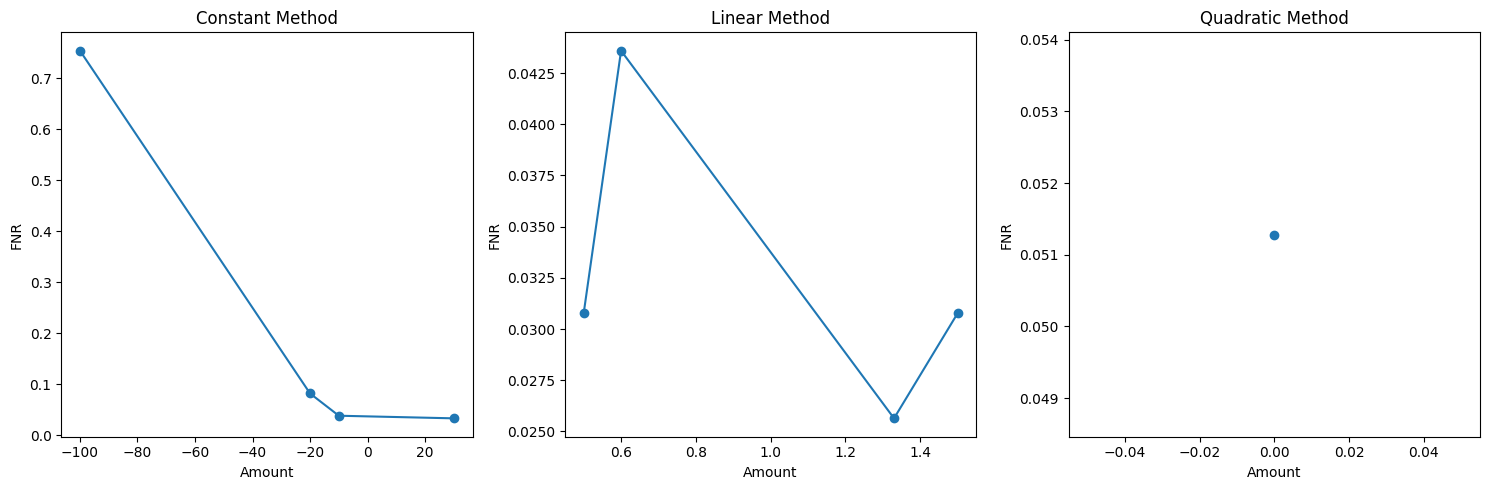

In [24]:
# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
linear_data = aggregated[aggregated["method"] == "linear"][["amount", "FNR"]]
linear_data.reset_index(drop=True, inplace=True)
quadratic_data = aggregated[aggregated["method"] == "quadratic"][["amount", "FNR"]]
quadratic_data.reset_index(drop=True, inplace=True)
constant_data = aggregated[aggregated["method"] == "constant"][["amount", "FNR"]]
constant_data.reset_index(drop=True, inplace=True)

# Plot FNR for constant method
axs[0].plot(constant_data["amount"], constant_data["FNR"], marker="o")
axs[0].set_title("Constant Method")
axs[0].set_xlabel("Amount")
axs[0].set_ylabel("FNR")

# Plot FNR for linear method
axs[1].plot(linear_data["amount"], linear_data["FNR"], marker="o")
axs[1].set_title("Linear Method")
axs[1].set_xlabel("Amount")
axs[1].set_ylabel("FNR")

# Plot FNR for quadratic method
axs[2].plot(quadratic_data["amount"], quadratic_data["FNR"], marker="o")
axs[2].set_title("Quadratic Method")
axs[2].set_xlabel("Amount")
axs[2].set_ylabel("FNR")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()